<a href="https://colab.research.google.com/github/vlamen/tue-deeplearning/blob/main/assignments/assignment_2_3/a3_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Number:

# Student 1: Ryan Meghoe

# Student 2: Nikita Jain

# Student 3: Rykov Andrei

# Downloading Data and Preliminaries

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from zipfile import ZipFile
import requests
import io

In [2]:
def load_zip(url):
    response = requests.get(url)
    response.raise_for_status()
    zipf = ZipFile(io.BytesIO(response.content))
    return {name: zipf.read(name) for name in zipf.namelist()}

def load_pickle(zipfile, fn):
    return pickle.load(io.BytesIO(zipfile[fn]))

In [3]:
data = load_zip('https://surfdrive.surf.nl/files/index.php/s/cwqGaS22KXgnXtg/download')

    
"""
simulation_{train, valid, test} is stored as a list of simulations. 
Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
"""
simulation_train = load_pickle(data, 'data/train/simulation.pickle')  # 3.1 + 3.2
simulation_valid = load_pickle(data, 'data/valid/simulation.pickle')  # 3.1 + 3.2
simulation_test = load_pickle(data, 'data/test/simulation.pickle')  # 3.1 + 3.2

"""
charges_{train, valid, test} is stored as a list of simulation-charges. 
These charges are stored as numpy arrays of size (3,): One value for each charge.
"""
charges_train = load_pickle(data, 'data/train/charges.pickle')  # 3.1
charges_valid = load_pickle(data, 'data/valid/charges.pickle')  # 3.1
charges_test = load_pickle(data, 'data/test/charges.pickle')  # 3.1

"""
simulation_continued_{train, valid, test} is stored as a list of simulations. 
Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
"""
simulation_continued_train = load_pickle(data, 'data/train/simulation_continued.pickle')  # 3.2
simulation_continued_valid = load_pickle(data, 'data/valid/simulation_continued.pickle')  # 3.2
simulation_continued_test = load_pickle(data, 'data/test/simulation_continued.pickle')  # 3.2

"""
Note that the indices are shared throughout the different lists, e.g., for the 4th training simulation:
simulation_train[3] contains its initial simulation
charges_train[3] contains the charges associated with the simulation
simulation_continued_train[3] contains the continuation of the simulation 
                --> simulation_continued_train[3][0] is the state after simulation_train[3][-1]
"""
pass

In [4]:
print('Overview of no. datapoints:\n')

print('Task 3.1:')
print(f'{len(simulation_train)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(charges_train)} train, {len(charges_valid)} validation, {len(charges_test)} test charge pairs')
print()

print('Task 3.2:')
print('Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations')
print('We cut simulation_train down to the first 150 samples in simulation_train_task32')
simulation_train_task32 = simulation_train[:150]
print(f'{len(simulation_train_task32)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(simulation_continued_train)} train, {len(simulation_continued_valid)} validation, {len(simulation_continued_test)} test continuations')

print(f"""
For task 3.1, use:
{chr(10).join(["simulation_{} + charges_{}".format(t, t) for t in ["train", "valid", "test"]])}

For task 3.2, use:
{chr(10).join(["simulation_{} + simulation_continued_{}".format(*((t[0], t[1]) if isinstance(t, tuple) else (t, t))) for t in [("train_task32", "train"), "valid", "test"]])}
""")


Overview of no. datapoints:

Task 3.1:
800 train, 100 validation, 100 test simulations
800 train, 100 validation, 100 test charge pairs

Task 3.2:
Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations
We cut simulation_train down to the first 150 samples in simulation_train_task32
150 train, 100 validation, 100 test simulations
150 train, 100 validation, 100 test continuations

For task 3.1, use:
simulation_train + charges_train
simulation_valid + charges_valid
simulation_test + charges_test

For task 3.2, use:
simulation_train_task32 + simulation_continued_train
simulation_valid + simulation_continued_valid
simulation_test + simulation_continued_test



In [25]:
[(len(x), len(y)) for x,y in zip(simulation_train_task32, simulation_continued_train)]

[(103, 54),
 (97, 45),
 (99, 47),
 (91, 50),
 (105, 58),
 (104, 43),
 (96, 56),
 (93, 35),
 (102, 58),
 (93, 32),
 (90, 39),
 (90, 59),
 (102, 26),
 (106, 53),
 (107, 31),
 (102, 38),
 (102, 50),
 (108, 28),
 (100, 37),
 (103, 39),
 (110, 25),
 (90, 39),
 (104, 44),
 (99, 23),
 (94, 41),
 (99, 59),
 (104, 23),
 (94, 38),
 (93, 58),
 (101, 28),
 (96, 55),
 (91, 50),
 (95, 57),
 (91, 34),
 (105, 54),
 (103, 34),
 (104, 45),
 (101, 41),
 (104, 26),
 (108, 39),
 (98, 39),
 (94, 23),
 (108, 53),
 (103, 21),
 (96, 58),
 (104, 51),
 (90, 52),
 (98, 55),
 (91, 30),
 (95, 40),
 (96, 49),
 (109, 52),
 (107, 24),
 (95, 43),
 (94, 35),
 (95, 49),
 (91, 58),
 (102, 30),
 (103, 47),
 (90, 47),
 (90, 60),
 (110, 35),
 (110, 30),
 (106, 22),
 (98, 52),
 (96, 44),
 (104, 39),
 (104, 37),
 (105, 51),
 (107, 46),
 (101, 50),
 (94, 57),
 (91, 33),
 (107, 30),
 (103, 22),
 (110, 33),
 (92, 56),
 (98, 26),
 (106, 41),
 (107, 55),
 (90, 60),
 (103, 52),
 (97, 27),
 (99, 54),
 (94, 25),
 (102, 51),
 (98, 49),

In [5]:
print('Print some shapes:\n')
for i in range(3):
    print('simulation_train[{}].shape:'.format(i), simulation_train[i].shape, '-> (t, 2), (x, y) at every t)')
    print('charges_train[{}].shape:'.format(i), charges_train[i].shape, '-> charges for the simulation')
    print('simulation_continued_train[{}].shape:'.format(i), simulation_continued_train[i].shape, '-> (t, 2), (x, y) at every t)')
    print('----\n')

Print some shapes:

simulation_train[0].shape: (103, 2) -> (t, 2), (x, y) at every t)
charges_train[0].shape: (3,) -> charges for the simulation
simulation_continued_train[0].shape: (54, 2) -> (t, 2), (x, y) at every t)
----

simulation_train[1].shape: (97, 2) -> (t, 2), (x, y) at every t)
charges_train[1].shape: (3,) -> charges for the simulation
simulation_continued_train[1].shape: (45, 2) -> (t, 2), (x, y) at every t)
----

simulation_train[2].shape: (99, 2) -> (t, 2), (x, y) at every t)
charges_train[2].shape: (3,) -> charges for the simulation
simulation_continued_train[2].shape: (47, 2) -> (t, 2), (x, y) at every t)
----



In [6]:
def plot_example(x, x_gt=None, x_pred=None, fn=None):
    charge_locations = np.array([[-1.53846154, -1.53846154],
                                 [ 1.53846154, -1.53846154],
                                 [ 0.        ,  1.53846154]])  # charge locations are fixed
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    plt.plot(x[:, 0], x[:, 1], color=cmap(0))
    plt.plot(x[0, 0], x[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(5, 5)
    for charge in charge_locations:
        plt.plot(charge[0], charge[1], 'd', color='black')
    if x_gt is not None:
        plt.plot(x_gt[:, 0], x_gt[:, 1], color='red', linewidth=.5)
    if x_pred is not None:
        plt.plot(x_pred[:, 0], x_pred[:, 1], color='green', linestyle='--')
    if fn is None:
        plt.show()
    else:
        plt.savefig(fn)

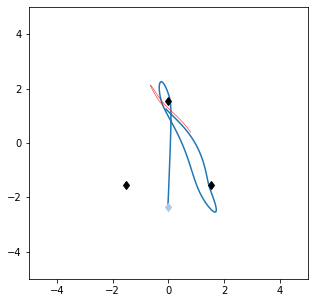

Charges are [-0.89292929 -0.89537468 -0.87927981]


In [7]:
test_idx = np.random.randint(150)
plot_example(simulation_train[test_idx], simulation_continued_train[test_idx])
print(f'Charges are {charges_train[test_idx]}')

# Task 3.1

In [18]:
len(simulation_train[12])

102

This is many-to-one model problem

As the input of the model (train_X) we have the sequence of positions (x1, x2) of various lengths; the output of the model (train_Y) is (c1, c2, c3)

## Data Handling and Preprocessing

#### todo

* prepare the data so the sequence length in one batch is equal
* use padding of the sequences to make the length the same (add zeros in the beggining?)


## Model Implementation

In [ ]:
#todo

In [ ]:
class ParticleCharge(nn.Model):
    def __init__(self, coordinate_embedding: int = 8, hidden_shape: int = 16, linear_shape: int = 16, output_shape: int = 3):
        super().__init__()
        
        self.embedding_location = self.Linear(2, coordinate_embedding)
        
        self.rnn = nn.LSTM(coordingate_embedding, hidden_shape)
        
        self.linear = nn.Sequential(nn.Linear(hidden_shape, linear_shape),
                                    nn.ReLU(),
                                    nn.BatchNorm1d(linear_shape),
                                    nn.Linear(linear_shape, output_shape))
        
        def forward(self, x):
            """x of shape (batch_size, sequence_length, coordinates)"""
            
            x = self.embedding_location(x)
            
            rnn_output, rnn_cell = nn.rnn(x)
            
            out = self.linear(rnn_output[:,-1,:])

## Model Training

In [ ]:
#todo

## Evaluation

In [ ]:
#todo

# Task 3.2

This task requires us to build a sequence-to-sequence model.

## Data Handling and Preprocessing

#### todo

As an input (train_X) we got data (batch_norm, sequence_length, 2), where sequence_length varies 
As the output we got another (train_Y) we got the data of size (batch_norm, sequence_length2, 2), where sequence_length2 also can vary

As the result, for one batch, we need to get maximum length of sequence_length + sequence_length2
and as the result put the padding before the training_sequence and also after the sequence_length2.
However, we also need to keep the actual length of output sequence to evaluate only target values.

So in the model we can do next:


|   | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |10 |
|---|---|---|---|---|---|---|---|---|---|---|
|Evaluation Sequence1| - | - | - | - | 0 | y1| y2| y3| 0 | 0 |
|Predicted Sequence1| 0 | 0 | 0 | 0 | 0 | p1| p2| p3| v | v |
|Training Sequence1| 0 | x1| x2| x3| x4| 0 | 0 | 0 | 0 | 0 |

(last three *v* are not interesting for us during the evaluation)

## Model Implementation

In [ ]:
#todo

## Model Training

In [ ]:
#todo

## Evaluation

In [ ]:
#todo